# Keras 패키지를 사용한 신경망 구현

## Keras Modules

* Model
 * Sequentials = neural network
 * Graph


* Layers 
 * Dense = fully connected regular neural network
 * Dropout
 * Activations


* Activations
 * sigmoid
 * tanh
 * relu
 * softmax
* Initializer
 * normal 
 * uniform




* Regularizer 
 * l1
 * l2
 * l1l2
* Loss
 * mean_squared_error
 * categorical_crossentropy
* Optimizer
 * SGD

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255.0
Y_train = np_utils.to_categorical(y_train, 10)

Using Theano backend.


In [9]:
import time
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(30, input_dim=784, activation="sigmoid", init='normal'))
model1.add(Dense(10, activation="sigmoid", init='normal'))
model1.compile(loss='mse', optimizer=SGD(), metrics=["accuracy"])

hist1 = model1.fit(X_train, Y_train, nb_epoch=10, batch_size=10)
time.sleep(0.1)

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.1031 - acc: 0.1406     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.0898 - acc: 0.1340     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.0896 - acc: 0.1570     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.0893 - acc: 0.1722     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.0890 - acc: 0.2352     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0886 - acc: 0.2609     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.0881 - acc: 0.2819     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.0874 - acc: 0.2938     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.0864 - acc: 0.2986     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.0850 - acc: 0.3001     


In [4]:
hist1.history['loss']

[0.10349472273513674,
 0.089933410111814743,
 0.089741638963421189,
 0.089564429062108195,
 0.089352834892769656,
 0.089089687384665009,
 0.088751876104623081,
 0.088306966252624991,
 0.087706684077779457,
 0.086883960177501038]

In [10]:
model2 = Sequential()
model2.add(Dense(30, input_dim=784, activation="tanh"))
model2.add(Dense(10, activation="softmax"))
model2.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=["accuracy"])

hist2 = model2.fit(X_train, Y_train, nb_epoch=10, batch_size=10)
time.sleep(0.1)

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.4755 - acc: 0.8748     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.2759 - acc: 0.9217     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.2325 - acc: 0.9336     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.2053 - acc: 0.9415     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.1853 - acc: 0.9469     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.1703 - acc: 0.9507     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.1577 - acc: 0.9545     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.1480 - acc: 0.9575     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.1394 - acc: 0.9595     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.1322 - acc: 0.9622     


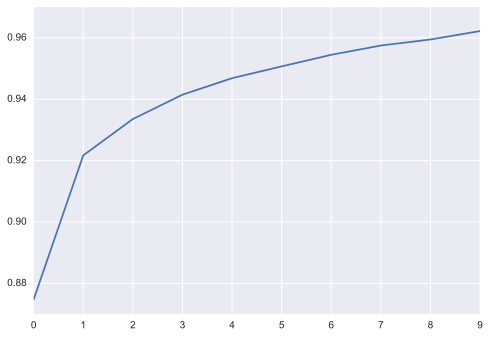

In [19]:
plt.plot(hist2.history["acc"])
plt.show()

In [17]:
model3 = Sequential()
model3.add(Dense(30, input_dim=784, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

%time hist3 = model3.fit(X_train, Y_train, nb_epoch=10, batch_size=10, verbose=0)

CPU times: user 43.5 s, sys: 0 ns, total: 43.5 s
Wall time: 43.5 s


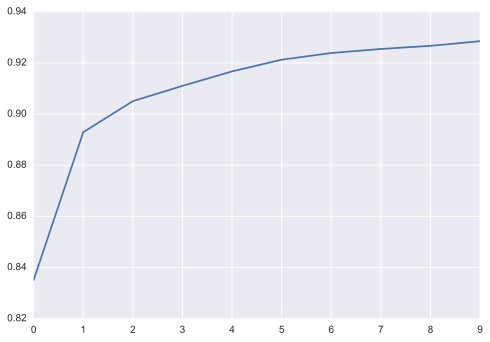

In [18]:
plt.plot(hist3.history["acc"])
plt.show()